In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 768,
        'scroll': True,
})
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 5]

# Week 14, ASTR 596: Fundamentals of Data Science


## Deep Learning
#### Many pretty pictures are borrowed from Federica Bianco and Kostya Malanchev

### Gautham Narayan 

##### <gsn@illinois.edu>

<table>
<thead>
  <tr>
    <th>Method</th>
    <th>Unsupervised</th>
    <th>Supervised</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td>Centroid-based</td>
    <td>k-Means</td>
    <td>kNN w/ k=1 (aka Nearest Centroid - we've not covered this but I'll give you an example ntbk) </td>
  </tr>
  <tr>
    <td>Linkage-based Model</td>
    <td>Hierarchical Clustering</td>
    <td>Decision Trees/Random Forests</td>
  </tr>
  <tr>
    <td>Parametric Density Model</td>
    <td>GMMs, Extreme Deconvolution</td>
    <td>Gaussian Naive Bayes, LDA, QDA</td>
  </tr>
  <tr>
    <td>Nonparametric Density/Locally Weighted*</td>
    <td>DBSCAN/Optics</td>
      <td>kNN with k>1, <strong>SVM, MLPs, DNN</strong></td>
  </tr>
</tbody>
</table>

* = KDEs are perfectly useable in either column

## And now for biology!!

There's a long history of design being influenced by biology
<img src="rsta20160192f19.jpg">

## And this includes algorithms
<img src="msb201178-fig-0002-m.jpg">

<img src="bioneuron.png">

Signals are responses to stimuli caused by changing the balanace of Na+ and K+ ions within the Axon (which in turn changes the bias voltage between the terminal and dendrite) - allows a signal to be transmitted down the axon.

<img src="neuronal_action_potential.jpg">

<img src="Action_Potential_Propagation_Along_Axon_Animation.gif">

<img src="myelinated-axon.gif">

If this is interesting, you can look at a more detailed explanation here: https://www.getbodysmart.com/nervous-system/action-potential-events

<img src="McCulloughPitts1943.png">

<img src="bioneuron2.png" width="600px">

<img src="mp_neuron.png">

<img src="perceptron1.png">

<img src="perceptron2.png">

<img src="perceptron3.png">

## OK, but how do we get the weights when this is linear regression, but the output is binary (0, 1)

### Recall the discriminant function from Tuesday:


## $$\begin{eqnarray} \widehat{y} & = & \left\{ \begin{array}{cl} 1 & \mbox{if $g(x) > \theta$}, \\ 0 & \mbox{otherwise,} \end{array} \right. \end{eqnarray}$$

Where $\theta$ is the **threshold**

We compare the output vector $y$ to the target/truth $t$ and we want to minimize the error

## $$ E = 1/2 \cdot (t-y)^2$$

To minimize the error, we need to change the weights of the inputs to get $t$ close to $y$.

Let's do this with our old friend, **gradient descent**

## $$w_i = w'_i - \eta \cdot \frac{dE}{dw_i} $$

Where $\eta$ is some constant that we'll call the **learning rate**

## $$w_i = w'_i + \eta \cdot (t-y) \cdot\frac{dy}{dw_i} $$

## $$\frac{dy}{dw_i} = x_i $$

so..

## $$w_i = w'_i + \eta \cdot (t-y) \cdot x_i $$


If $y != t$ (and remember the t is just a 0 or 1):
## $$ w_{\text{new}}  = w_{\text{old}} + \eta \cdot t \cdot x$$

and $y == t$, don't update

<img src="mk1_perceptron.jpg">

<img src="1960_preceptron.png">

<img src="Mark_I_perceptron.jpeg">

# The first step to neural networks: Linear Regression

\begin{equation}
\large
f(x) = \sum_j w_j x_j + c
\end{equation}

### MSE loss makes it to be the ordinal linear least sqaures problem

\begin{equation}
\large
\min_{\theta=\{w_j,c\}} \sum_i \left[y_i - \left(\sum_j w_j x_{ij} + c\right)\right]^2
\end{equation}

Do $\partial / \partial w_i = 0, \partial / \partial c = 0$ and you have the (analytical) solution!

### Regression

![](tf_linear_regression_good.png)

[TF playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=5&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.65532&showTestData=false&discretize=true&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=regression&initZero=false&hideText=false)

### Classification

Actualy it is also regression, but the real output value is converted to a binary label.
However, if we'd like to have outputs to be between 0 and 1 we need some normalisation, for example logistic function $\sigma(z) = 1 / (1 + \exp{-z})$.
In this case the model is called logistic regression.

![](tf_linear_regression_clf_good.png)

[TF playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=5&dataset=gauss&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.73566&showTestData=false&discretize=true&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### But what if the problem is not linear...

![](tf_linear_regression_clf_bad.png)

[TF playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=5&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.12820&showTestData=false&discretize=true&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### Sometimes we can solve it with a bit of feature engineering

![](tf_linear_regression_engineering.png)

[TF playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=5&dataset=circle&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2&seed=0.17882&showTestData=false&discretize=true&percTrainData=40&x=false&y=false&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&numHiddenLayers_hide=false)

# Making the model non-linear

\begin{eqnarray}
&\large h_1(x) = g\left(\sum_j w^{\{1\}}_j x + c^{\{1\}}\right), \\
&\large h_2(x) = g\left(\sum_j w^{\{2\}}_j x + c^{\{2\}}\right), \\
&\large h_3(x) = g\left(\sum_j w^{\{3\}}_j x + c^{\{3\}}\right), \\
&\large f(x) = w_{h1} h_1(x) + w_{h2} h_2(x) + w_{h3} h_3(x) + c_{h},
\end{eqnarray}

where $g$ is some (non-linear) scalar function, same for all transformations. Note that "weights" $w$ and "biases" (or, if we'd write minus instead of plus, "thresholds") $c$ are different for each transformation.

![](tf_slp3.png)

[TF playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=5&dataset=circle&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=3&seed=0.17882&showTestData=false&discretize=true&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&numHiddenLayers_hide=false)

### Can we make it better? Easy!

It has $2 \times 8 + 8 \times 1 = 24$ weights.

![](tf_slp8.png)

[TF playground](http://playground.tensorflow.org/#activation=sigmoid&batchSize=5&dataset=circle&regDataset=reg-gauss&learningRate=0.03&regularizationRate=0&noise=0&networkShape=8&seed=0.17882&showTestData=false&discretize=true&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&numHiddenLayers_hide=false)

<img src="perceptron4.png">

<img src="perceptron5.png">

<img src="perceptron6.png">

## 

- The Rosenblatt Perceptron uses the class labels to learn model coefficients

- The Adaline Neuron uses continuous predicted values (from the net input) to learn the model coefficients, which is more “powerful” since it tells us by “how much” we were right or wrong
    - the weights are how sensitive a neuron is 
    - the activation function turns neurons on/off 
    - The loss function of the network is updated to penalize models in proportion to the magnitude of their activation
    - prevents updating weights when y gets close to t - i.e. prevents overfitting!

    
## $$w_i = w'_i + \eta \cdot (t-y) \cdot\frac{df(y)}{dw_i} $$

<img src="adaline_vs_perceptron.png">

<img src="activation_functions.png">

## In-not actually class-class exercise:

https://jalammar.github.io/feedforward-neural-networks-visual-interactive/

# Multi-layer perceptron = dense neural network

In practice, single layer is not sufficient, we need huge neuron to solve real world problems.

We can easialy add layers feeding the next perceptron to the output of the previous one.

![](tf_mlp_relu.png)
[TF Playground](http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=5&dataset=circle&regDataset=reg-gauss&learningRate=0.001&regularizationRate=0.001&noise=0&networkShape=3,3,3,3,3,3&seed=0.95354&showTestData=false&discretize=true&percTrainData=40&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&numHiddenLayers_hide=false)

Multi-layer neural network is covered by "arbitrary depth" universal approximation theorem, which is proven for some specific cases.

### Fit spiral dataset yourself: [TF playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=&seed=0.04277&showTestData=false&discretize=false&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

<!--
![](tf_mlp_relu_spiral.png)
[TF playground](http://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=5&dataset=spiral&regDataset=reg-gauss&learningRate=0.001&regularizationRate=0.001&noise=0&networkShape=4,4,4,4,4,4&seed=0.75252&showTestData=false&discretize=true&percTrainData=70&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&numHiddenLayers_hide=false)
-->

<img src="mlp1.png">

<img src="mlp2.png">

## In-class exercise: Implementing a simple MLP Classifier with `sklearn`

Our neural network will take an $\mathbf{x} = (x_1, x_2)$ vector as input and output a $K$-dimensional vector $\mathbf{p}=(p_1,\dots,p_K)$ of class probabilities. For simplicity we'll focus on a single choice of activation function, the ReLU function $f(x) = \max(x, 0)$.

In [2]:
# Imports / plotting configuration
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('poster')
plt.rcParams['image.interpolation'] = 'nearest'  # hard classification boundaries
plt.rcParams['image.cmap'] = 'viridis'
np.random.seed(13)

In [3]:
# Generate spiral sample data
# N = num points
# K = num spiral arms
# sigma = some noise
def spiral_data(N, K=3, sigma=0.1):
    X = np.zeros((N * K, 2))
    y = np.zeros(N * K, dtype='int')

    for j in range(K):
        ix = range(N * j, N * (j + 1))
        r = np.linspace(0.0, 1, N)  # radius
        theta = 2 * np.pi * j / K + np.linspace(0, 3 * np.pi, N) + np.random.randn(N) * sigma
        X[ix] = np.c_[r * np.sin(theta), r * np.cos(theta)]
        y[ix] = j
        
    return X, y

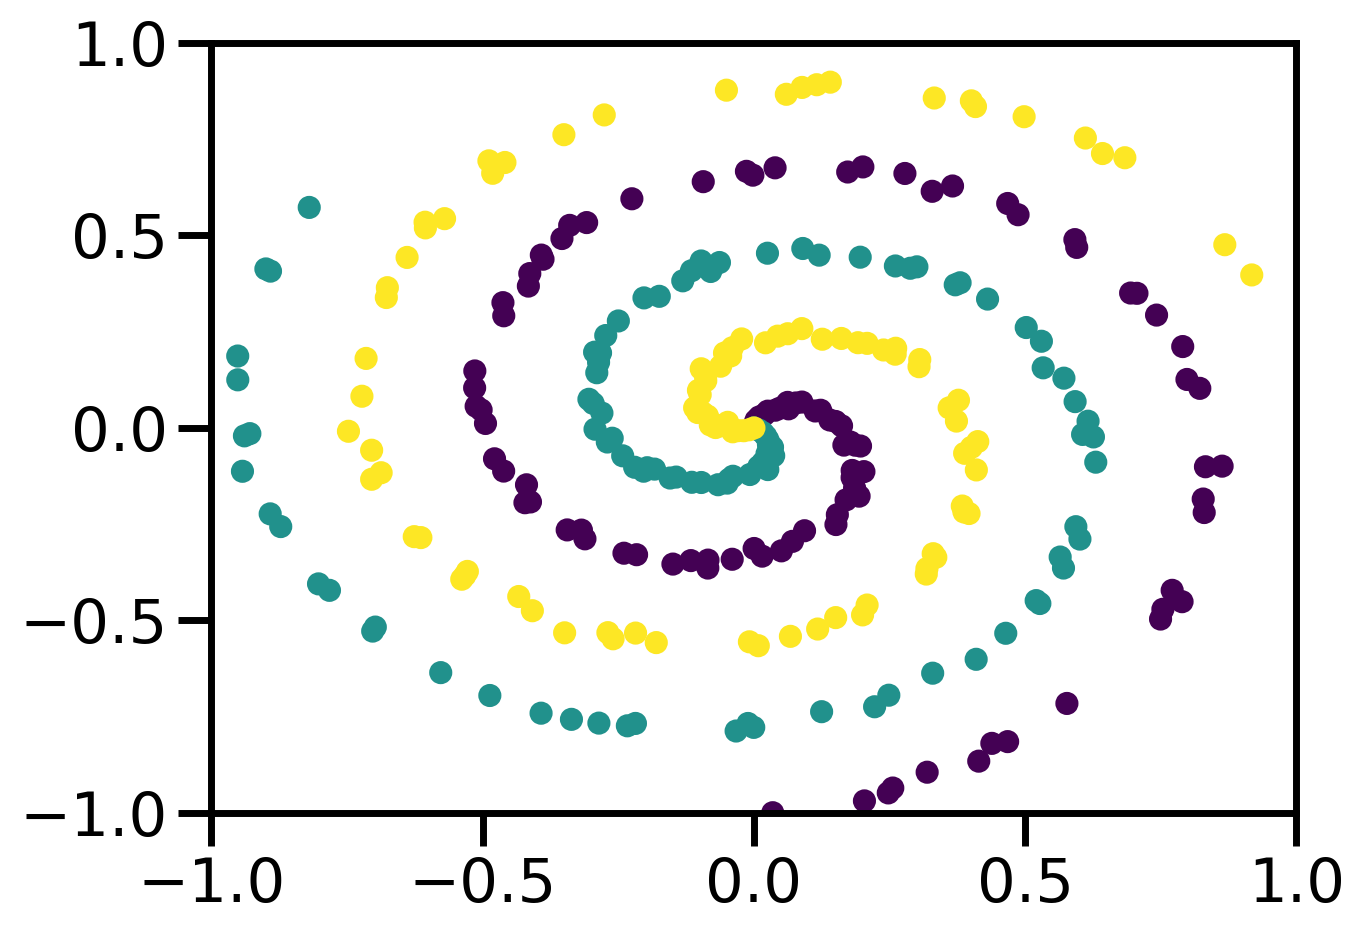

In [4]:
N = 100
K = 3
X, y = spiral_data(N, K, 0.1)

# Visualize the generated data
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='viridis')
plt.xlim([-1, 1])
plt.ylim([-1, 1]);

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin

class SingleLayerReLU(BaseEstimator, ClassifierMixin):
    """Skeleton code for single-layer multi-class neural network classifier w/ ReLU activation.
    NOTE: Whenever you change the code below, you need to re-run this cell AND re-initialize
    your model (`model = SingleLayerNet(...)`) in order to update your specific `model` object.
    """
    def __init__(self, hidden_size, num_classes, sigma_init=0.01):
        """Initialize weights with Gaussian noise scaled by `sigma_init` and
        biases with zeros.
        """
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.W1 = sigma_init * np.random.randn(hidden_size, 2)
        self.W2 = sigma_init * np.random.randn(num_classes, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.b2 = np.zeros(num_classes)
    
    def loss(self, y, P):
        """Compute total softmax loss.
        Inputs:  y -> (N,) array of true (integer) labels
                 p -> (N, K) array of predicted probabilities
        Outputs: L -> total loss value       
        """
        return -np.sum(np.log(P[range(len(P)), y]))
        
    def dloss(self, X, y):
        """Compute gradient of softmax loss with respect to network weights.
        Inputs:  X -> (N, 2) array of network inputs
                 y -> (N,) array of true labels
        Outputs: dW1 -> (hidden_size, 2) array of weight derivatives
                 dW2 -> (hidden_size, 2) array of weight derivatives
                 db1 -> (hidden_size,) array of bias derivatives
                 db2 -> (hidden_size,) array of bias derivatives
        """
        H = np.maximum(0, X @ self.W1.T + self.b1)  # ReLU activation
        Z = H @ self.W2.T + self.b2
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)

        dZ = P
        dZ[range(len(X)), y] -= 1

        dW2 = (H.T @ dZ).T
        db2 = np.sum(dZ, axis=0)

        dH = dZ @ self.W2
        dH[H <= 0] = 0  # backprop ReLU  activation

        dW1 = (X.T @ dH).T
        db1 = np.sum(dH, axis=0)
        
        return (dW1, dW2, db1, db2)

    def predict_proba(self, X):
        """Compute forward pass for all input values.
        Inputs:  X -> (N, 2) array of network inputs
        Outputs: P -> (N, K) array of class probabilities
        """
        H = np.maximum(0, X @ self.W1.T + self.b1)  # ReLU activation
        Z = H @ self.W2.T + self.b2
        P = np.exp(Z) / np.sum(np.exp(Z), axis=1, keepdims=True)
        
        return P
        
    def predict(self, X):
        """Compute most likely class labels for all input values.
        Inputs:  X -> (N, 2) array of network inputs
        Outputs: P -> (N, K) array of class probabilities
        """
        P = self.predict_proba(X)
        return np.argmax(P, 1)
        
    def fit(self, X, y, step_size=3e-3, n_iter=10000):
        """Optimize model parameters W1, W2, b1, b2 via gradient descent.
        Inputs:  X -> (N, 2) array of network inputs
                 y -> (N,) array of true labels
                 step_size -> gradient descent step size
                 n_iter -> number of gradient descent steps to perform
        Outputs: losses -> (n_iter,) array of loss values after each step
        """
        losses = np.zeros(n_iter + 1)
        for i in range(0, n_iter + 1):
            dW1, dW2, db1, db2 = self.dloss(X, y)
            self.W1 -= step_size * dW1
            self.W2 -= step_size * dW2
            self.b1 -= step_size * db1
            self.b2 -= step_size * db2
            
            P = self.predict_proba(X)
            losses[i] = self.loss(y, P)
            
            if i % 1000 == 0:
                print("Iteration {}: loss={}".format(i, losses[i]))
        return losses

In [6]:
def visualize_predictions(model, X, y, step=0.02):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Accuracy: {}%".format(100 * np.mean(y == model.predict(X))))

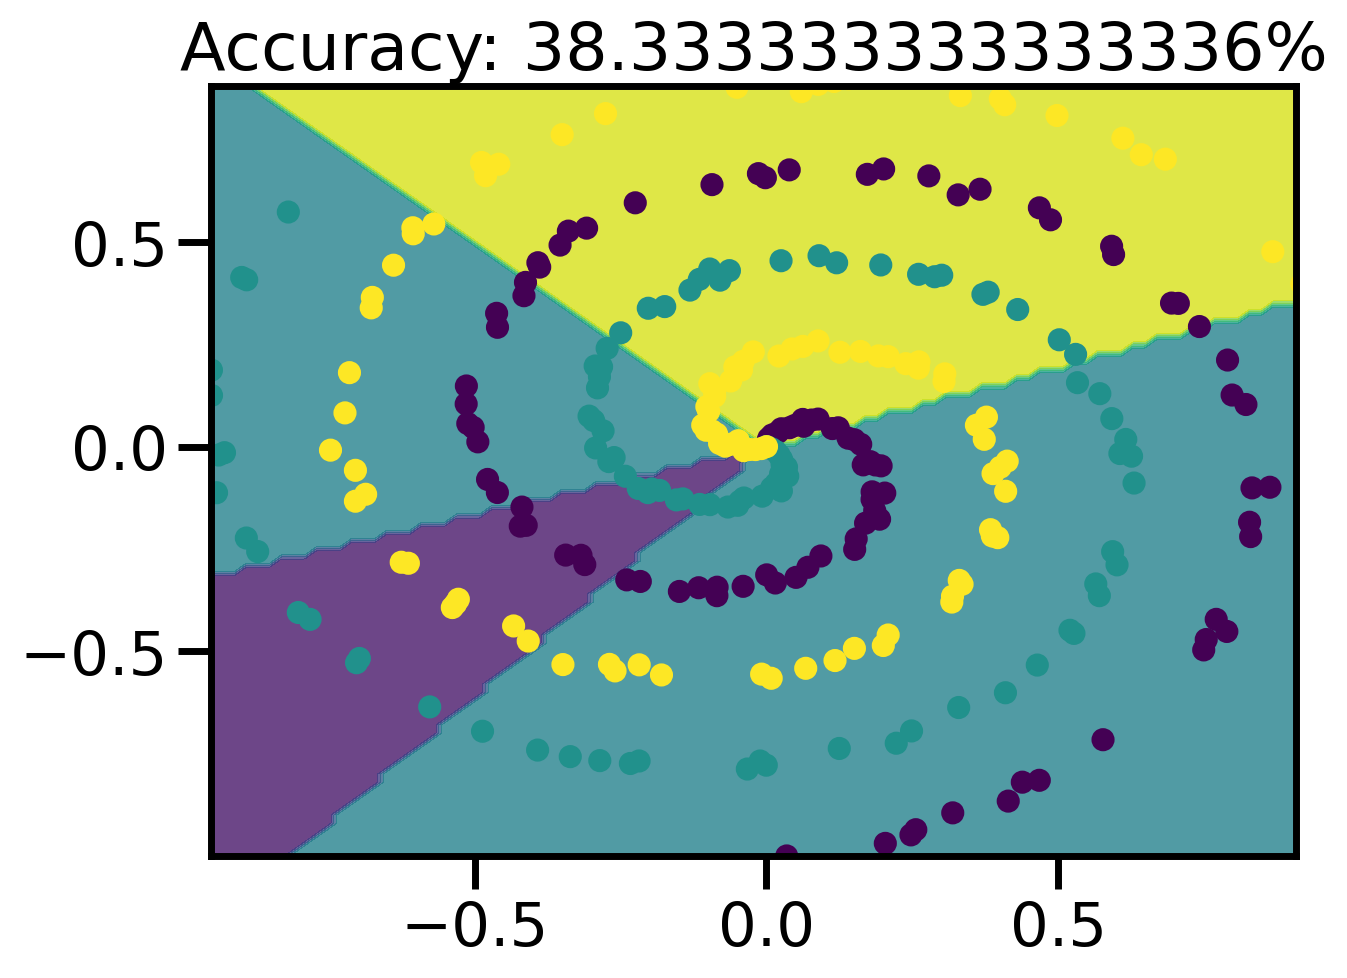

In [7]:
model = SingleLayerReLU(100, K)
visualize_predictions(model, X, y)

Iteration 0: loss=329.57930627191524
Iteration 1000: loss=310.6331224673452
Iteration 2000: loss=273.4607492793974
Iteration 3000: loss=224.73791651994654
Iteration 4000: loss=210.33757711880494
Iteration 5000: loss=122.27935564865132
Iteration 6000: loss=208.01845077893242
Iteration 7000: loss=75.0842217205641
Iteration 8000: loss=59.41910431615203
Iteration 9000: loss=48.61899836365113
Iteration 10000: loss=38.65835164427445
Iteration 11000: loss=33.040121124571364
Iteration 12000: loss=24.17721005948045
Iteration 13000: loss=18.303020268639738
Iteration 14000: loss=15.734871930735013
Iteration 15000: loss=14.030050849857862
Iteration 16000: loss=12.625372003972453
Iteration 17000: loss=11.408707072447932
Iteration 18000: loss=10.584912168963397
Iteration 19000: loss=9.770876147055926
Iteration 20000: loss=9.20851281674597


<Figure size 700x500 with 0 Axes>

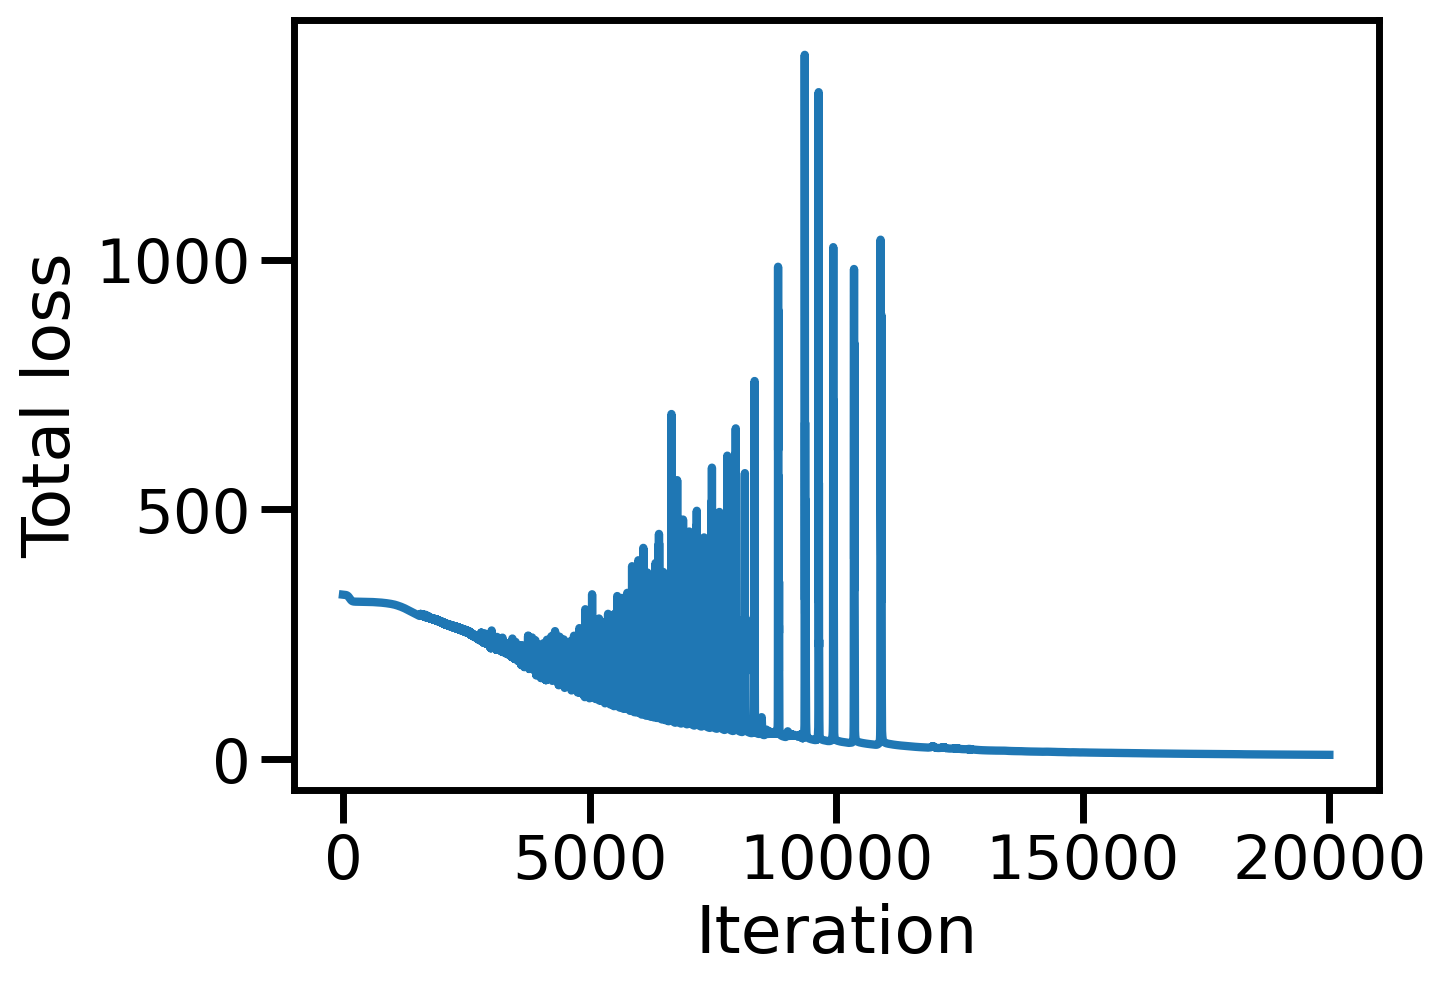

<Figure size 700x500 with 0 Axes>

In [8]:
model = SingleLayerReLU(100, K)
losses = model.fit(X, y, step_size=2e-3, n_iter=20000)
plt.plot(losses, '-')
plt.xlabel('Iteration')
plt.ylabel('Total loss');
plt.figure()

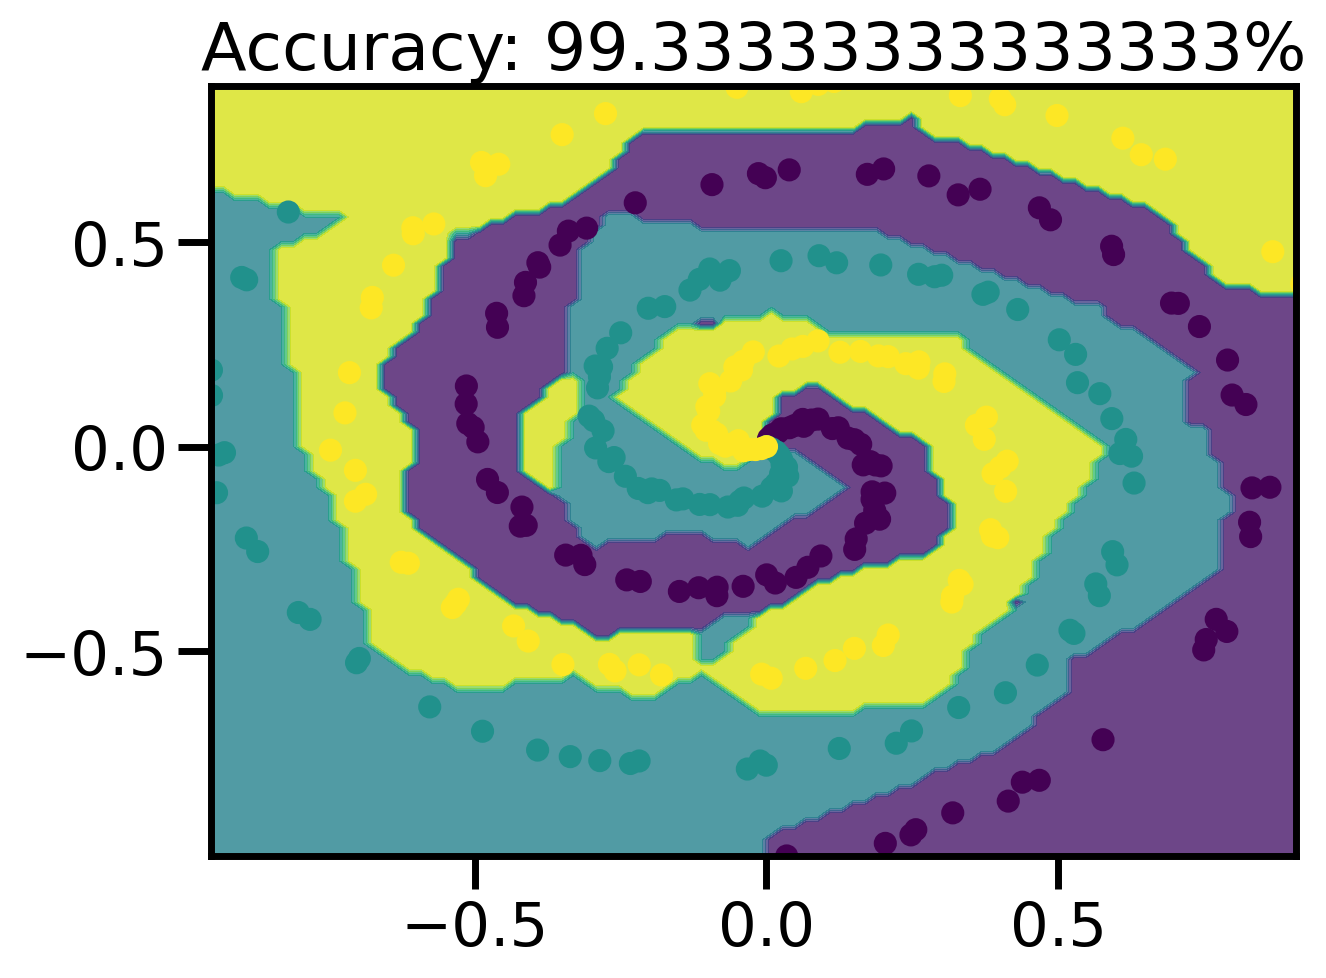

In [9]:
visualize_predictions(model, X, y)

In [10]:
from sklearn.neural_network import MLPClassifier

X, y = spiral_data(100, 5, 0.1)
single_layer_model = MLPClassifier((8,), activation='identity', solver='lbfgs')
single_layer_model.fit(X, y)

MLPClassifier(activation='identity', hidden_layer_sizes=(8,), solver='lbfgs')

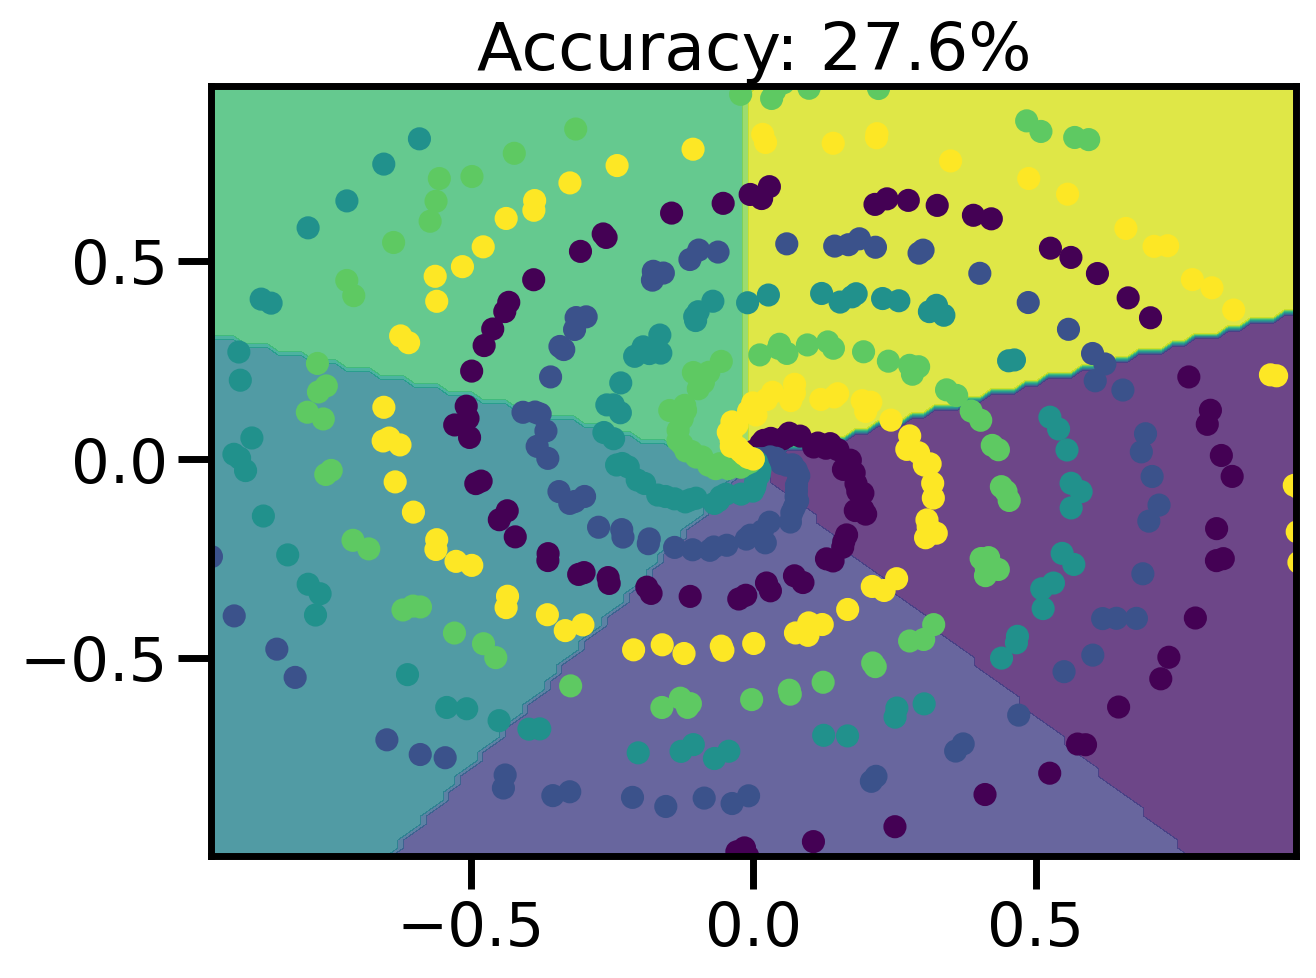

In [11]:
visualize_predictions(single_layer_model, X, y)

/Users/gnarayan/miniconda3/envs/yse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


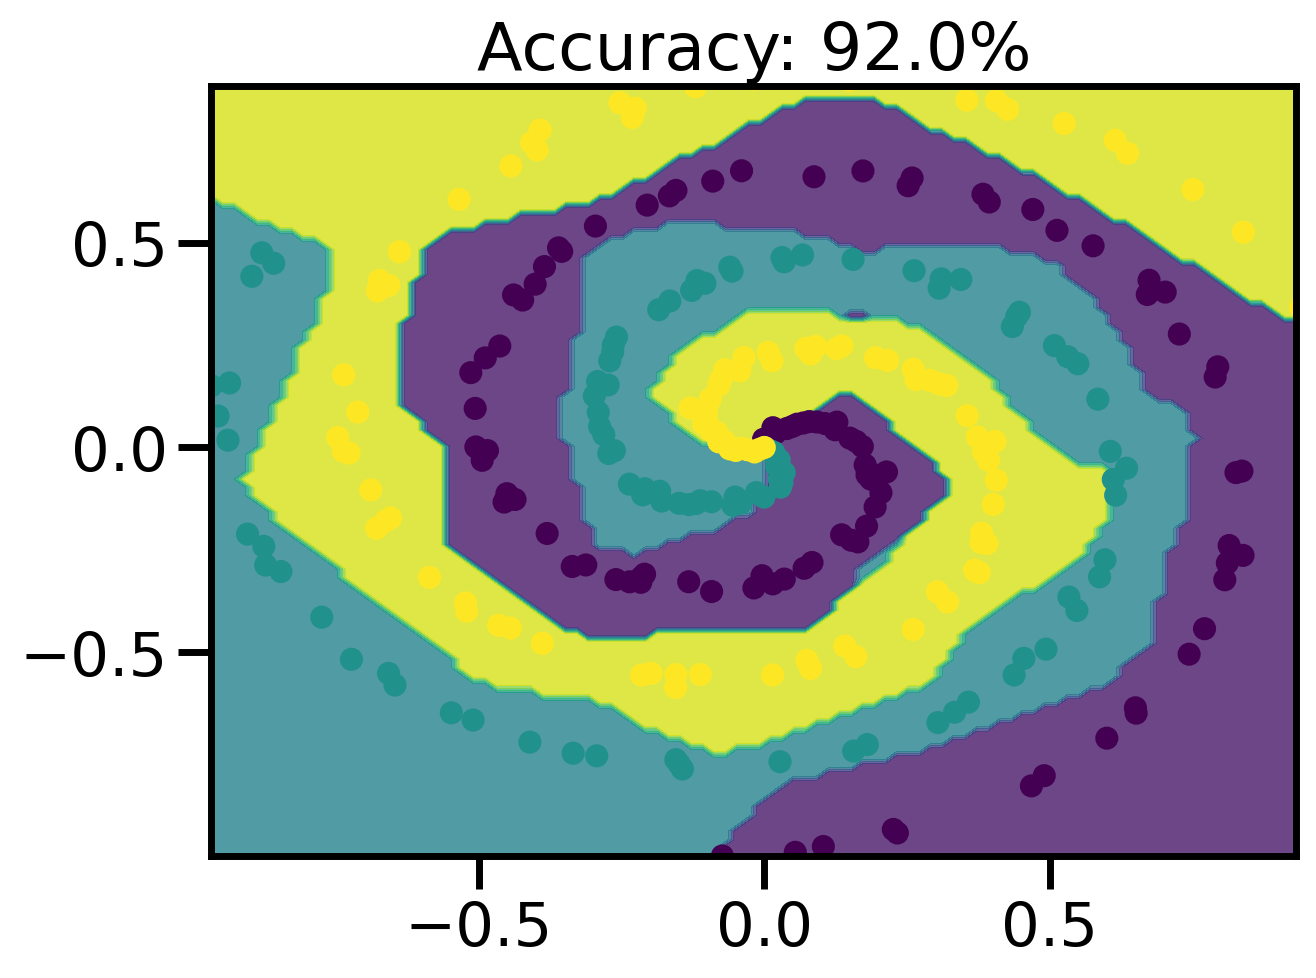

In [12]:
X, y = spiral_data(100, 3, 0.1)
multi_layer_model = MLPClassifier((100, 100), alpha=0.5, activation='relu', solver='lbfgs')
multi_layer_model.fit(X, y)
visualize_predictions(multi_layer_model, X, y)

/Users/gnarayan/miniconda3/envs/yse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


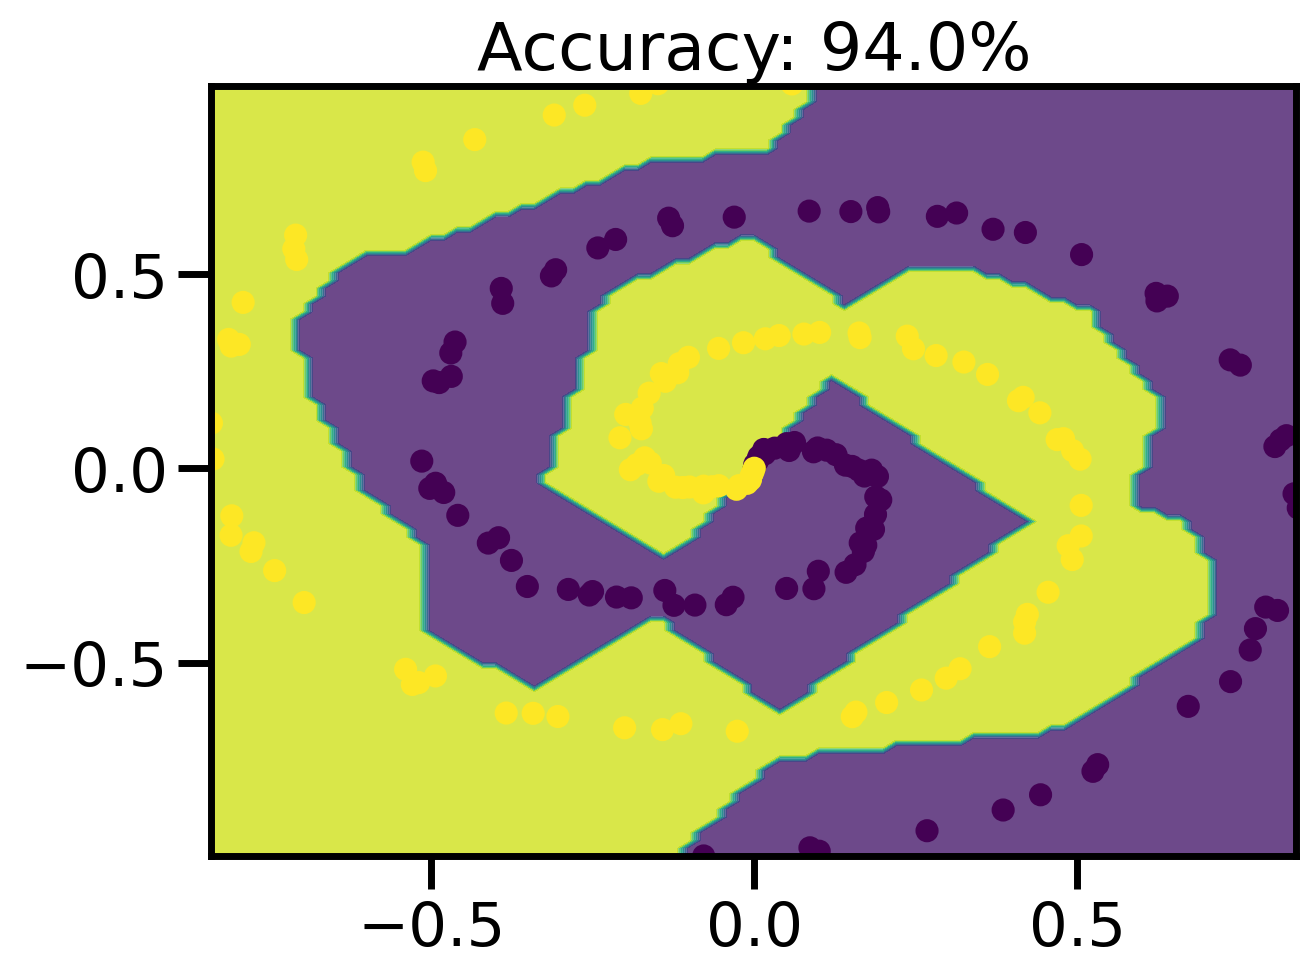

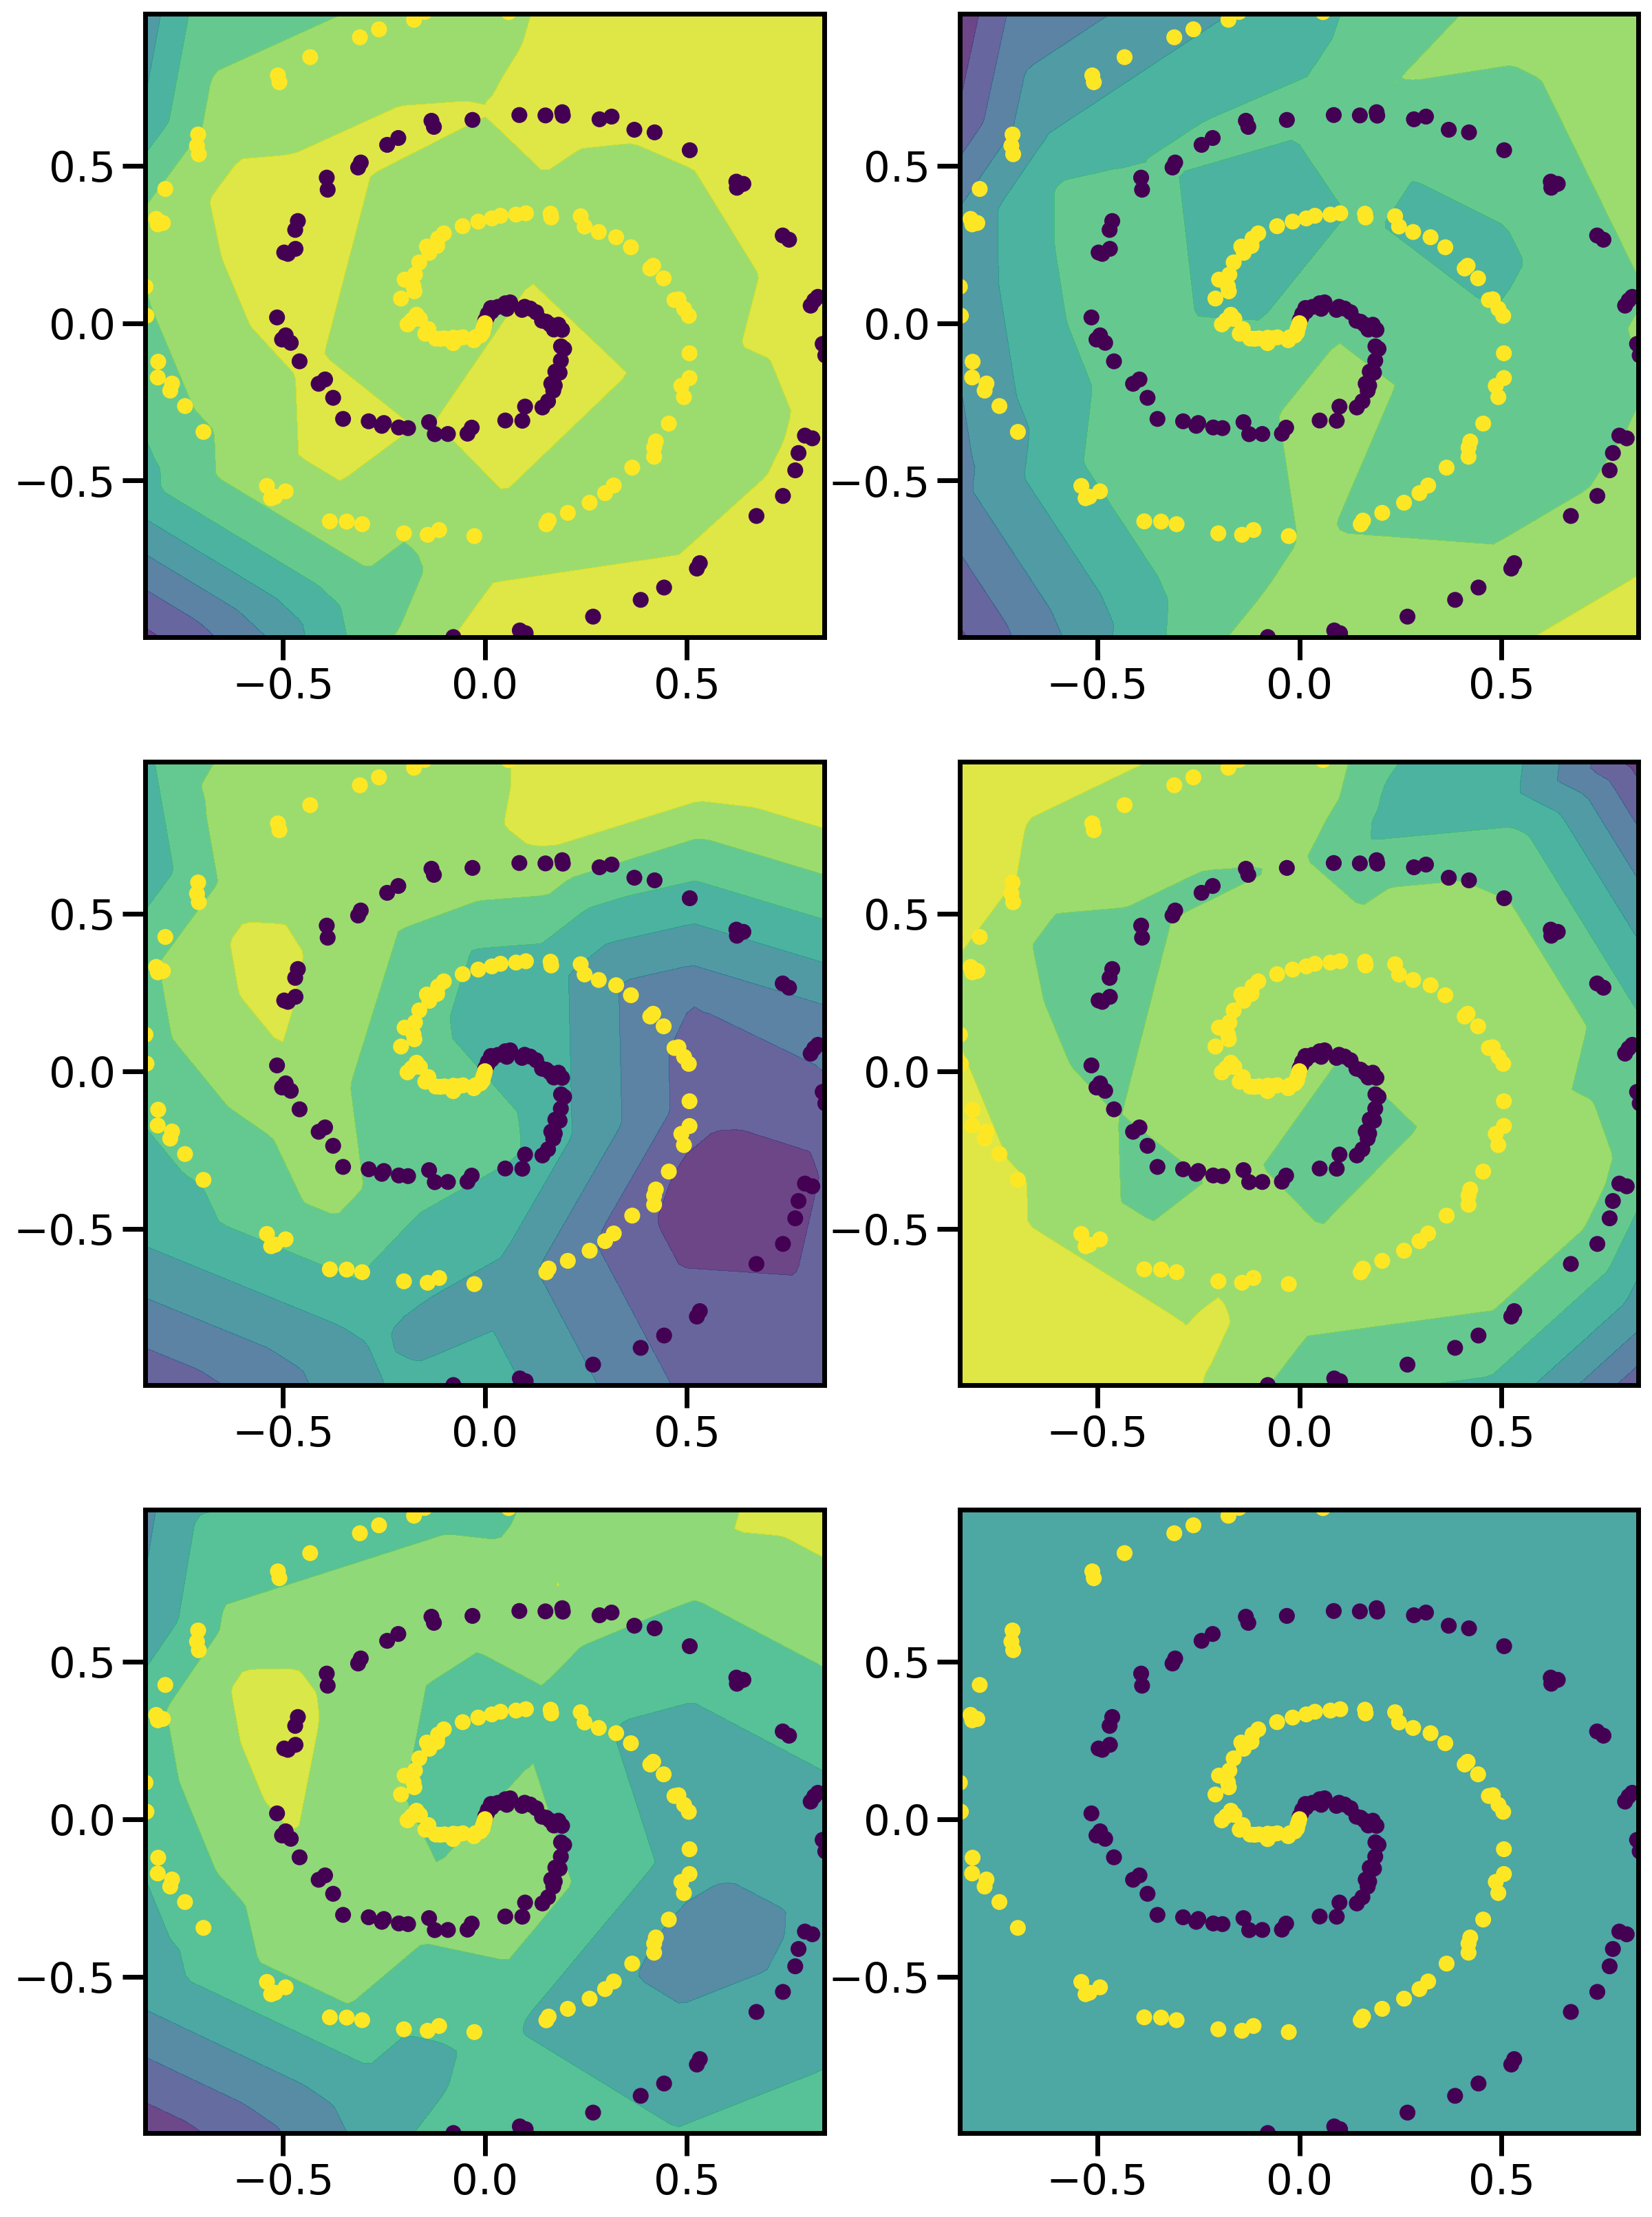

In [13]:
# you can view the activations of the final layer if needed

from copy import deepcopy

X, y = spiral_data(100, 2, 0.1)
multi_layer_model = MLPClassifier((64, 6), alpha=0.5, activation='relu', solver='lbfgs')
multi_layer_model.fit(X, y)
visualize_predictions(multi_layer_model, X, y)

def visualize_activations(model, unit, X, y, step=0.02):
    """Visualize activations of ith neuron of last layer."""
    model = deepcopy(model)
    model.coefs_[-1][:unit] = 0  # zero out other units
    model.coefs_[-1][unit] = 1  # just want the activation function
    model.coefs_[-1][(unit + 1):] = 0  # zero out other units
    
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
fig, ax = plt.subplots(3, 2, figsize=(14, 20))
for i in range(len(multi_layer_model.coefs_[-1])):
    plt.sca(ax.ravel()[i])
    visualize_activations(multi_layer_model, i, X, y)

## In-class exercise: Implementing a simple MLP Regressor with `sklearn`

### Predict house prices in Boston with an MLP regressor
### Use `cross_val_predict` to see how well you do after 5-fold cross-validation


In [14]:
#Execute this cell 

%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
print(boston.DESCR)

X = boston.data
y = boston.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/gnarayan/miniconda3/envs/yse/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califor

/Users/gnarayan/miniconda3/envs/yse/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


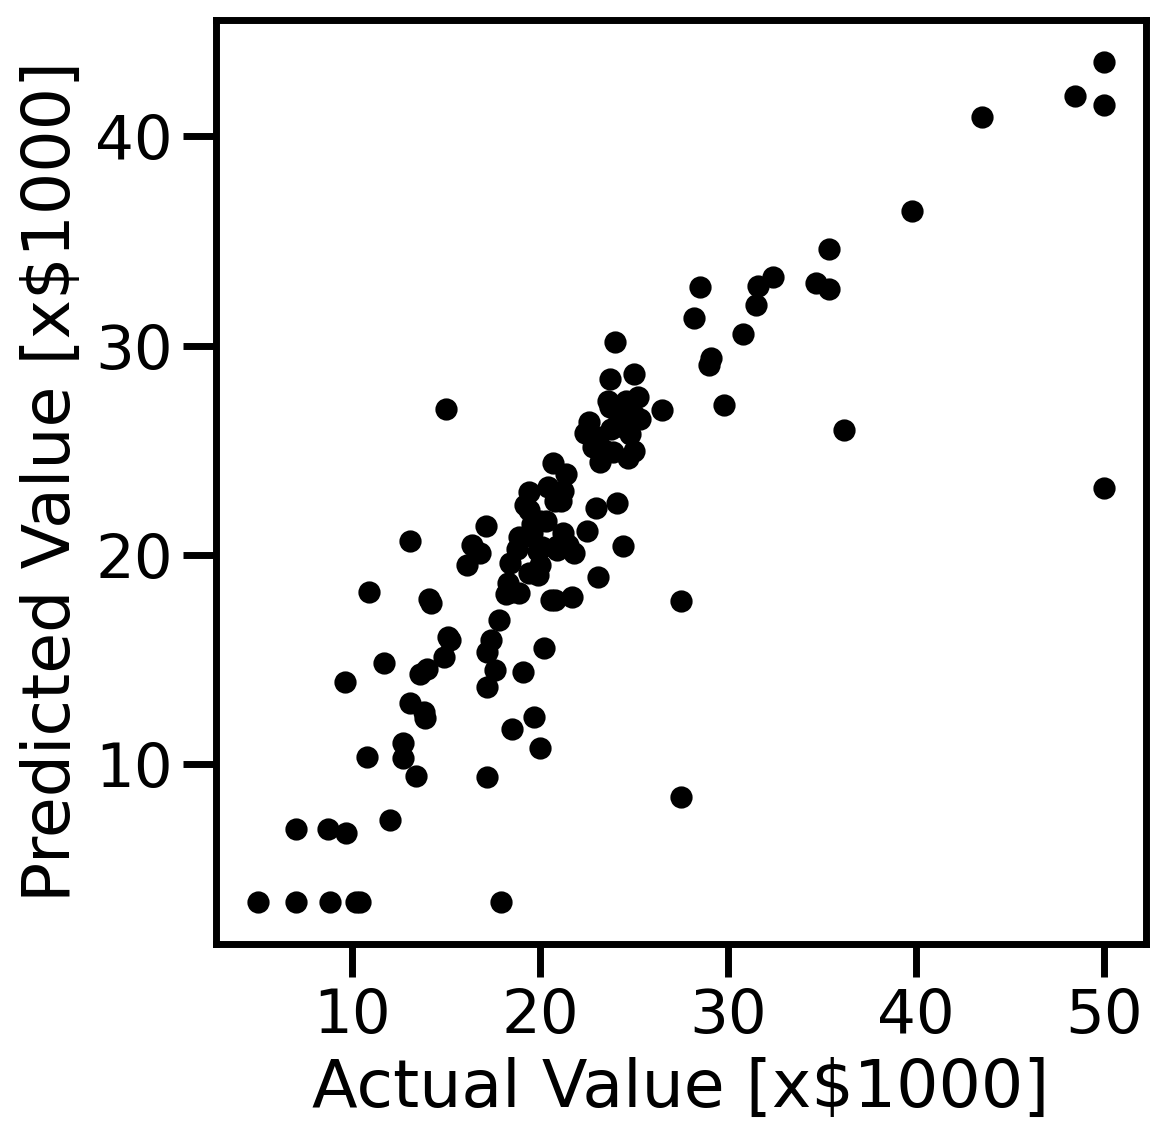

In [15]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
## YOUR CODE HERE
clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1, activation='relu')
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

fig = plt.figure(figsize=(6, 6))
plt.scatter(ytest,ypred, marker='.', color='k')
plt.xlabel("Actual Value [x$1000]")
plt.ylabel("Predicted Value [x$1000]")
plt.show()

In [16]:
# You can get the coefficients/weights of each layer if you need
[coef.shape for coef in clf.coefs_]
clf.coefs_

[array([[-0.09581473,  0.25085756, -0.57721817, -0.22824667, -0.08771453],
        [-0.47072682, -0.37148575, -0.1783311 , -0.11920265,  0.01295104],
        [-0.09330613,  0.19272838, -0.34126913,  0.43661238,  0.05999763],
        [ 0.19683892, -0.09556326,  0.06776917, -0.41524537,  0.05507044],
        [ 0.3472699 ,  0.53984523, -0.21543919,  0.22207502,  0.61528187],
        [ 0.4556525 , -0.48814589, -0.53225366, -0.38124697,  4.3533327 ],
        [-0.4637891 , -0.18515031,  0.52872526,  0.03829597, -0.01755799],
        [-0.21302419,  0.21084821,  0.38639242, -0.55623276, -0.58753095],
        [ 0.56448813,  0.26293781, -0.25352143,  0.33403098,  0.13940704],
        [-0.06016737, -0.3038527 , -0.23831384, -0.24505592, -0.00862817],
        [-0.5549872 ,  0.17837315, -0.33298315, -0.27072338, -0.47409898],
        [-0.51573248, -0.24700912, -0.40792268,  0.10312115,  0.01028266],
        [-0.45918462, -0.12089935,  0.22447395, -0.09909724, -0.38657835]]),
 array([[ 0.74695516, -

## Why have one hidden layer when you can have two for twice the price!

<img src="dnn1.png">

<img src="dnn2.png">

# Types of neural networks
## - "Neural Network Zoo" (Asimov Institute)
<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/neuralnetworks.png">

https://towardsdatascience.com/the-mostly-complete-chart-of-neural-networks-explained-3fb6f2367464

This is clearly much more sophisticated than our basic perceptron. "Deep" networks consist of tens of layers with thousands of neurons. These large networks have become usabel thanks to two breakthroughs: the use of sparse layers and the power of graphics processing units (GPUs).
Many image processing tasks involve convolving an image with a 2-dimensional kernel as shown below.
![Convolution example](https://developer.apple.com/library/content/documentation/Performance/Conceptual/vImage/Art/kernel_convolution.jpg)

The sparse layers or convolutional layers in a deep network contain a large number of hidden nodes but very few synapses. The sparseness arises from the relatively small size of a typical convolution kernel (15x15 is a large kernel), so a hidden node representing one output of the convolution is connected to only a few input nodes. Compare this the our previous perceptron, in which every hidden node was connected to every input node.

Even though the total number of connections is greatly reduced in the sparse layers, the total number of nodes and connections in a modern deep network is still enormous. Luckily, training these networks turns out to be a great task for GPU acceleration! Serious work using neural networks is almost always done usign specialized GPU-accelerated platforms.

- Great flexibility: we can use NNs with images, sound, text, time series, probability distributions, etc.
- Combination of linear algebra and scalar functions allow fast training and evaluation on GPUs and special processor units such as tensor PUs, neural PUs or even field-programmable gate arrays.
- Re-usability: you can take someone else's architecture and train the network for your data, or you can even get someone else's weights and fine-tune it.

# Deep learning frameworks

## - Python(-compatible) - like sklearn only for NN models:
- Tensorflow (Google)
- Keras (frontend for TensorFlow + Theano)
- Theano (Université de Montréal)
- Caffe (UC Berkeley)
- CNTK (Microsoft)
- MXNet (Amazon+Baidu+...)

<img src="mindmap.jpg">